In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import xgboost as xgb

In [ ]:
data = pd.read_csv("NewData-1.csv")
feature = data[data.columns[0:9]]
label = data[data.columns[9:10]]
print(feature)
X_train, X_test,y_train,y_test = train_test_split(feature,label,random_state=104, test_size=0.2, shuffle=True)
st_x= StandardScaler()
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)
model = RandomForestClassifier(n_estimators=20,criterion="entropy")
print(X_train.shape,y_train.shape)
model.fit(X_train,y_train)



     1  27  6.1  6  42  6.2  1.1  77   4200
0    1  28  6.2  6  60    8    0  75  10000
1    1  28  5.9  4  30    8    2  85   3000
2    1  29  6.1  6  30    8    0  70   8000
3    1  29  7.8  7  75    6    0  70   8000
4    1  29  6.1  6  30    8    0  70   8000
..  ..  ..  ... ..  ..  ...  ...  ..    ...
146  0  59  8.1  9  75    3    1  68   7000
147  0  59  8.0  9  75    3    1  68   7000
148  0  59  8.1  9  75    3    1  68   7000
149  0  59  8.0  9  75    3    1  68   7000
150  0  59  8.1  9  75    3    1  68   7000

[151 rows x 9 columns]
(120, 9) (120, 1)


<ipython-input-85-e7feb2b152f2>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=20)

In [ ]:
y_pred= model.predict(X_test)
print(y_pred.shape)
y_test = np.array(y_test).reshape(31,)
print(y_pred == y_test)
print(y_pred)
print(y_test)

(31,)
[ True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True False  True  True  True  True]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]


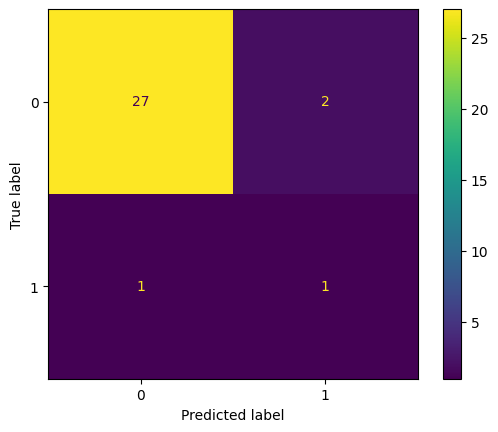

In [ ]:
# confusion matrix
counfusionMatrix = confusion_matrix(y_pred,y_test)
draw = ConfusionMatrixDisplay(counfusionMatrix)
draw.plot()
plt.show()


In [ ]:
"""Code for neural network based classification"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv("NewData-1.csv")
feature = data[data.columns[0:9]]
label = data[data.columns[9:10]]
print(feature)
X_train, X_test,y_train,y_test = train_test_split(feature,label,random_state=104, test_size=0.2, shuffle=True)
st_x= StandardScaler()
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)
print(X_train.shape)

     1  27  6.1  6  42  6.2  1.1  77   4200
0    1  28  6.2  6  60    8    0  75  10000
1    1  28  5.9  4  30    8    2  85   3000
2    1  29  6.1  6  30    8    0  70   8000
3    1  29  7.8  7  75    6    0  70   8000
4    1  29  6.1  6  30    8    0  70   8000
..  ..  ..  ... ..  ..  ...  ...  ..    ...
146  0  59  8.1  9  75    3    1  68   7000
147  0  59  8.0  9  75    3    1  68   7000
148  0  59  8.1  9  75    3    1  68   7000
149  0  59  8.0  9  75    3    1  68   7000
150  0  59  8.1  9  75    3    1  68   7000

[151 rows x 9 columns]
(120, 9)


In [ ]:
model = Sequential([
    Dense(units=25,activation="relu",name="layer-1"),
    Dense(units=15,activation="relu",name="layer-2"),
    Dense(units=5,activation="relu",name="layer-3"),
    Dense(units=1,activation="sigmoid",name="output-layer")
])

model.compile(optimizer='Adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test, y_test))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


4/4 [==============================] - 3s 102ms/step - loss: 0.7566 - accuracy: 0.2833 - val_loss: 0.7562 - val_accuracy: 0.2581
Epoch 2/20
1/4 [======>.......................] - ETA: 0s - loss: 0.7386 - accuracy: 0.2812

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


4/4 [==============================] - 0s 15ms/step - loss: 0.7345 - accuracy: 0.3417 - val_loss: 0.7258 - val_accuracy: 0.4194
Epoch 3/20
4/4 [==============================] - 0s 13ms/step - loss: 0.7125 - accuracy: 0.4500 - val_loss: 0.6992 - val_accuracy: 0.5484
Epoch 4/20
4/4 [==============================] - 0s 12ms/step - loss: 0.6942 - accuracy: 0.5667 - val_loss: 0.6768 - val_accuracy: 0.6774
Epoch 5/20
4/4 [==============================] - 0s 14ms/step - loss: 0.6781 - accuracy: 0.7083 - val_loss: 0.6586 - val_accuracy: 0.9355
Epoch 6/20
4/4 [==============================] - 0s 14ms/step - loss: 0.6663 - accuracy: 0.8333 - val_loss: 0.6462 - val_accuracy: 0.9355
Epoch 7/20
4/4 [==============================] - 0s 14ms/step - loss: 0.6580 - accuracy: 0.8417 - val_loss: 0.6371 - val_accuracy: 0.9355
Epoch 8/20
4/4 [==============================] - 0s 13ms/step - loss: 0.6517 - accuracy: 0.8417 - val_loss: 0.6273 - val_accuracy: 0.9355
Epoch 9/20
4/4 [======================

In [ ]:
# confusion matrix
counfusionMatrix = confusion_matrix(y_pred,y_test)
draw = ConfusionMatrixDisplay(counfusionMatrix)
draw.plot()
plt.show()


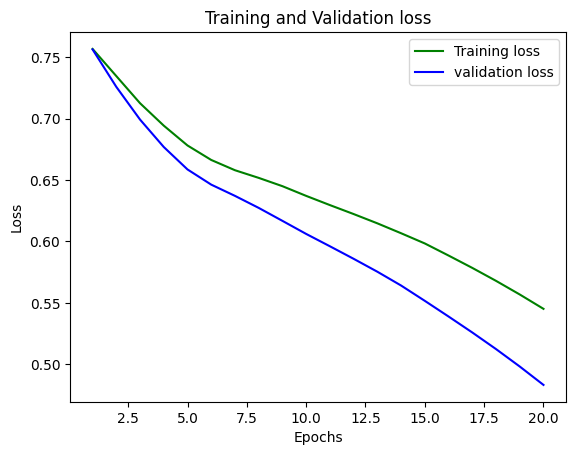

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



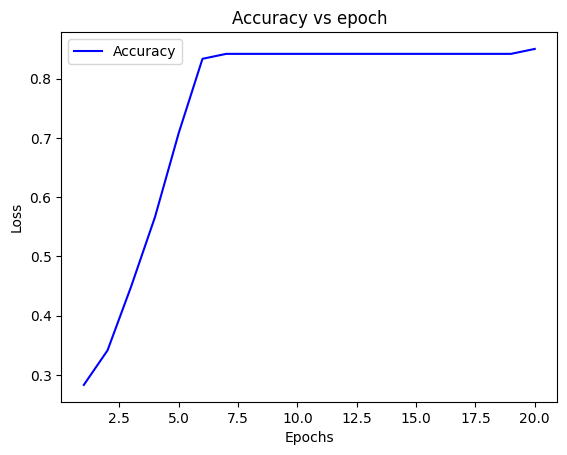

In [ ]:
loss_train = history.history['accuracy']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'b', label='Accuracy')
plt.title('Accuracy vs epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [2]:
import pandas as pd
import pickle as pl

In [4]:
f = open("/content/drive/MyDrive/Dataset/dataset_OSAS.pickle","rb")
content = pl.load(f)
data = pd.DataFrame(content)
f.close()

In [15]:
data.head()
data.columns
data["signal_ecg_i"][0]

array([122, 121, 121, 120, 121, 123, 124, 125, 125, 124, 124, 124, 125,
       125, 124, 124, 124, 124, 125, 124, 124, 124, 124, 124, 123, 124,
       124, 124, 124, 123, 123, 124, 124, 124, 124, 123, 124, 125, 126,
       127, 128, 129, 129, 128, 124, 124, 123, 123, 123, 123, 120, 124,
       156, 182, 142, 124, 122, 123, 122, 122, 122, 122, 122, 123, 123,
       123, 123, 124, 123, 123, 123, 122, 122, 121, 121, 121, 121, 122,
       123, 124])